<a href="https://colab.research.google.com/github/Zizi32/ImageWatermarkingusingOpenCV/blob/main/WatermarkusingOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
uploaded= files.upload()

Saving nature.jpg to nature.jpg


In [ ]:
uploaded= files.upload()

Saving Logop.png to Logop.png


In [ ]:
image_2= cv2.imread('nature.jpg')
image_1= cv2.imread('mlogo.png')

In [ ]:
def preprocessing(src, overlay, pos=(0, 0), scale=1): 

    overlay = cv2.resize(overlay, (0, 0), fx=scale, fy=scale)

    h, w, _ = overlay.shape  

    rows, cols, _ = src.shape  

    y, x = pos[0], pos[0] 
    for i in range(h):

     for j in range(w):

         if x + i >= rows or y + j >= cols:

             continue
         alpha = float(overlay[i][j][0] / 255.0) 
         src[x + i][y + j] = alpha * overlay[i][j][:3] + (1 - alpha)*src[x + i][y + j]
    return src

In [ ]:
def transparentOverlay(backgroundImage, overlayImage, pos=(0, 0), scale=1):
    overlayImage = cv2.resize(overlayImage, (0, 0), fx=scale, fy=scale)
    h, w, _ = overlayImage.shape  # Size of foreground
    rows, cols, _ = backgroundImage.shape  # Size of background Image
    y, x = pos[0], pos[1]  # Position of foreground/overlayImage image

    # loop over all pixels and apply the blending equation
    for i in range(h):
        for j in range(w):
            if x + i >= rows or y + j >= cols:
                continue
            alpha = float(overlayImage[i][j][2] / 255.0)  # read the alpha channel
            backgroundImage[x + i][y + j] = alpha * overlayImage[i][j][:3] + (1 - alpha) * backgroundImage[x + i][y + j]
    return backgroundImage

In [ ]:
def addImageWatermark(LogoImage,MainImage,opacity,pos=(100,10),):
    opacity = opacity / 100
    OriImg = cv2.imread(MainImage, -1)
    waterImg = cv2.imread(LogoImage, -1)
    tempImg = OriImg.copy()
    print(tempImg.shape)
    overlay = transparentOverlay(tempImg, waterImg, pos)
    output = OriImg.copy()
    # apply the overlay
    cv2.addWeighted(overlay, opacity, output, 1 - opacity, 0, output)
    cv2_imshow(output)

(340, 582, 3)


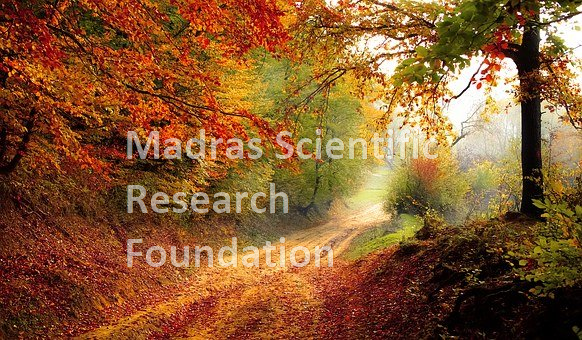

In [ ]:
if __name__ == '__main__':
    addImageWatermark('Logop.png','nature.jpg',50,(100,10))